In [67]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

import scipy.stats as st

In [13]:
data = pd.read_csv('data/measurements.csv', decimal=",")
display(data)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [14]:
#Looking for NaN values:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [15]:
#Take a closer look into columns with NaNs:
data[data['refill liters'].notna()]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
44,5.4,3.3,32,21.5,7,NaN,SP98,0,0,0,37.6,SP98
82,10.5,3.6,42,20.0,10,NaN,SP98,0,0,0,37.7,SP98
106,162.7,5.5,75,23.0,1,NaN,SP98,0,0,0,45.0,SP98
139,16.1,5.4,24,21.5,7,rain,E10,0,1,0,38.0,E10
171,44.4,4.8,38,21.5,8,NaN,E10,0,0,0,38.3,E10
191,43.7,4.7,44,22.0,9,half rain half sun,SP98,0,1,0,10.0,SP98
192,12.1,4.2,43,22.0,4,NaN,SP98,0,0,0,39.0,SP98
234,19.0,4.5,29,22.5,10,NaN,E10,0,0,0,39.0,E10
274,25.7,4.9,50,22.0,10,rain,SP98,0,1,0,41.0,SP98


In [19]:
data['specials'].value_counts(dropna=False)

NaN                   295
rain                   32
sun                    27
AC                     14
AC rain                10
AC sun                  5
snow                    3
half rain half sun      1
AC snow                 1
Name: specials, dtype: int64

In [17]:
# AC should always be upper case
data['specials'] = data['specials'].str.replace('ac','AC')
data['specials'] = data['specials'].str.replace('Sun','sun')
data['specials'] = data['specials'].str.replace('sun AC','AC sun')

data['specials'].value_counts()

rain                  32
sun                   27
AC                    14
AC rain               10
AC sun                 5
snow                   3
half rain half sun     1
AC snow                1
Name: specials, dtype: int64

In [7]:
# I choose to drop this column for now because of lack of time

In [8]:
# I will drop the refill columns. Only ~4% of the data set has any value in it. 
# Maybe will come back to this if I have time left


In [20]:
data_cleaned= data.drop(['refill liters', 'refill gas', 'specials'], axis=1)

In [21]:
data_cleaned['temp_inside'].value_counts(dropna=False)

21.5    133
22.0    102
22.5     59
20.0     25
23.0     13
21.0     13
25.0     12
NaN      12
24.5      7
20.5      4
24.0      3
25.5      2
23.5      2
19.0      1
Name: temp_inside, dtype: int64

In [22]:
# I can either put the mute or drop those lines. It is just 3% of the total data set
# I choose the mute because it is the temperature most people choose to have in a car or inside
data_cleaned['temp_inside'] = data_cleaned['temp_inside'].fillna(21.5)

In [23]:
data_cleaned()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


In [25]:
#Check if all NaNs are gone
data_cleaned.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

In [32]:
data_cleaned['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [33]:
data_cleaned['target_num']=data_cleaned['gas_type']

In [40]:
#data['target_num']=data['gas_type']

In [41]:
#le = preprocessing.LabelEncoder()
#le.fit(["SP98", "E10"])
#list(le.classes_)
#data['target_num'] = le.transform(data['target_num'])

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(["SP98", "E10"])
list(le.classes_)
data_cleaned['target_num'] = le.transform(data_cleaned['target_num'])

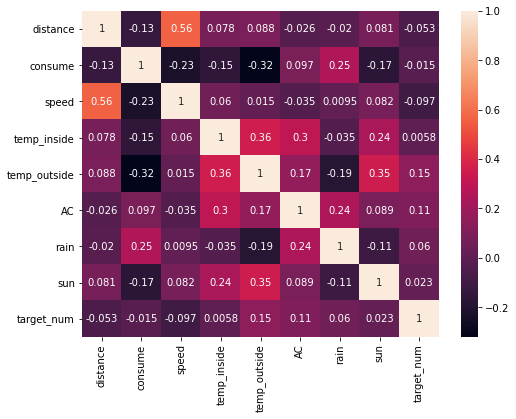

In [43]:
#Create a heatmap to see relations between the columns:
corr_matrix=data_cleaned.corr(method='pearson')
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [49]:
data_cleaned[['target_num', 'gas_type']]

,target_num,gas_type
0,0,E10
1,0,E10
2,0,E10
3,0,E10
4,0,E10
...,...,...
383,1,SP98
384,1,SP98
385,1,SP98
386,1,SP98


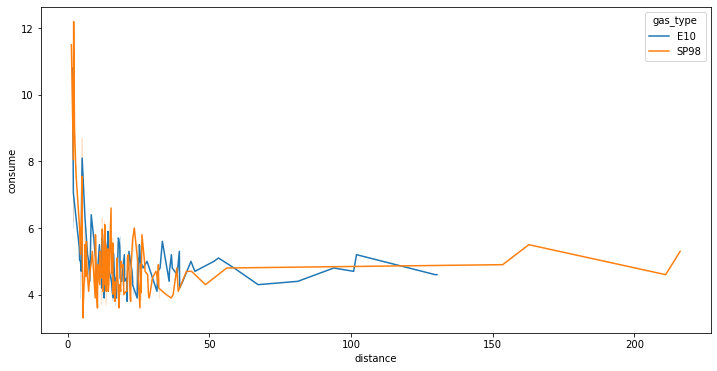

In [62]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.lineplot(data=data_cleaned, y='consume', x='distance', hue='gas_type')
plt.show()

In [ ]:
# In measure of distances the consume of E10 seems to be lower. 
# Will check this in the hypothesis testing

<AxesSubplot:xlabel='speed', ylabel='consume'>

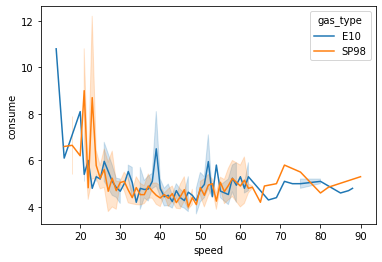

In [57]:
sns.lineplot(data=data_cleaned, y='consume', x='speed', hue='gas_type')

In [71]:
#Create a new column: consume/speed:
data_cleaned['consume/speed'] = data_cleaned['consume']/data_cleaned['speed']
#data_cleaned['consume/speed']

In [52]:
#Create a new column: consume/distance:
data_cleaned['consume/dist.'] = data_cleaned['consume']/data_cleaned['distance']
data_cleaned['consume/dist.']

0      0.178571
1      0.350000
2      0.491071
3      0.302326
4      0.243243
         ...   
383    0.231250
384    0.267081
385    0.237500
386    0.298701
387    0.340136
Name: consume/dist., Length: 388, dtype: float64

# Hypothesis test

In [ ]:
#I want to check whether a car needs more E10 than SP98 for the same trip

# H0: There is no difference between E10 and SP98 regarding consume/dist.

In [73]:
#First devide the data into E10 and SP98:
E10= data_cleaned[data_cleaned['gas_type']=='E10']
SP98 = data_cleaned[data_cleaned['gas_type']=='SP98']

In [66]:
SP98

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,target_num,consume/dist.
44,5.4,3.3,32,21.5,7,SP98,0,0,0,1,0.611111
45,2.0,9.9,21,21.5,4,SP98,0,0,0,1,4.950000
46,14.2,5.1,32,21.5,7,SP98,0,0,0,1,0.359155
47,16.0,4.9,25,21.5,8,SP98,0,0,0,1,0.306250
48,11.8,4.9,25,21.5,11,SP98,0,0,0,1,0.415254
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,1,0.231250
384,16.1,4.3,38,25.0,31,SP98,1,0,0,1,0.267081
385,16.0,3.8,45,25.0,19,SP98,0,0,0,1,0.237500
386,15.4,4.6,42,25.0,31,SP98,1,0,0,1,0.298701


In [69]:
st.ttest_ind(E10['consume/dist.'], SP98['consume/dist.'], equal_var=False)

Ttest_indResult(statistic=-0.9220189974404982, pvalue=0.35709963273853507)

In [ ]:
# alpha=0.05
# Since the p-value is 0.35. I therefore fail to reject the H0 hypothesis. 
# Which means regarding consume per distance it doesn't make a difference which gas type one uses

In [74]:
# Do the same for consume per speed:
# H0: There is no difference in consume per speed for E10 and SP98:
st.ttest_ind(E10['consume/speed'], SP98['consume/speed'], equal_var=False)

Ttest_indResult(statistic=-0.9552068404690537, pvalue=0.3401439999196487)

In [ ]:
# Again the p-value is 0.34. So I fail to reject the H0 hypothesis.
# I have reason to beleave that there is no difference

In [83]:
type(data_cleaned['distance'][1])

numpy.float64

In [77]:
data_cleaned.to_csv('data_cleaned.csv', index=False)